In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) T
Invalid input. Must be one of ('y', 'yes', '1', 'n', 'no', '0', '')
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might hav

In [2]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt

In [3]:
texts = [
    "I enjoy spending time alone reading books.",
    "I love socializing and meeting new people.",
    "I am very organized and like to plan things ahead of time.",
    "I often find myself procrastinating and delaying tasks.",
]

In [4]:
pipe = pipeline("text-classification", model="Minej/bert-base-personality")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
for text in texts:
    result = pipe(text)
    print(f"Text: {text}")
    print(f"Predicted Personality: {result[0]['label']}, Confidence: {result[0]['score']:.2f}")
    print('-' * 50)

Text: I enjoy spending time alone reading books.
Predicted Personality: LABEL_1, Confidence: 0.29
--------------------------------------------------
Text: I love socializing and meeting new people.
Predicted Personality: LABEL_1, Confidence: 0.26
--------------------------------------------------
Text: I am very organized and like to plan things ahead of time.
Predicted Personality: LABEL_1, Confidence: 0.25
--------------------------------------------------
Text: I often find myself procrastinating and delaying tasks.
Predicted Personality: LABEL_1, Confidence: 0.28
--------------------------------------------------


In [6]:
tokenizer = AutoTokenizer.from_pretrained("Minej/bert-base-personality")
model = AutoModelForSequenceClassification.from_pretrained("Minej/bert-base-personality")

In [7]:
text = "I prefer to work in a structured environment."

In [8]:
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

In [9]:
logits = outputs.logits
predicted_class_idx = torch.argmax(logits, dim=-1).item()

In [10]:
labels = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
predicted_class = labels[predicted_class_idx]

print(f"Predicted Personality: {predicted_class}")

Predicted Personality: Conscientiousness


In [11]:
text = "I enjoy socializing and meeting new people."
inputs = tokenizer(text, return_tensors="pt")

In [12]:
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits.squeeze().tolist()

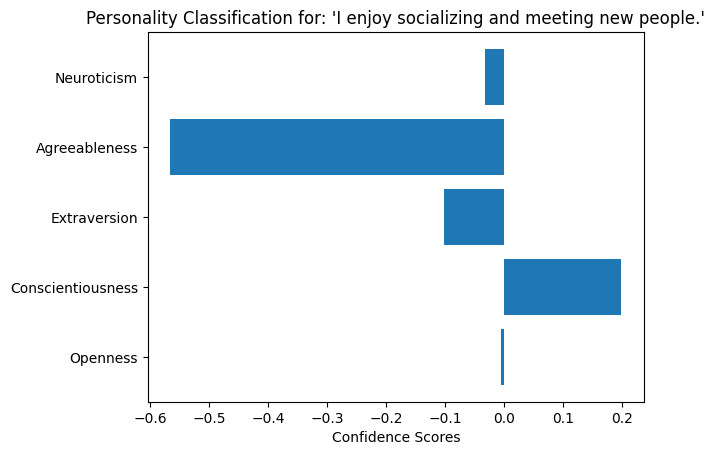

In [13]:
labels = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]

plt.barh(labels, logits)
plt.xlabel("Confidence Scores")
plt.title("Personality Classification for: 'I enjoy socializing and meeting new people.'")
plt.show()